In [245]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

#####  Retrieve the names of the 22 files and assign them to a List variable
##### You would need to filter out other files
##### Display the names of these 22 files

In [3]:
cur_dir = os.getcwd()
cur_dir

'C:\\Users\\gouth\\DATA 690'

In [4]:
files = os.listdir("CollegeScorecard_Raw_Data")
files

['.DS_Store',
 'Crosswalks.zip',
 'data.yaml',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [5]:
files1=[]
for i in range(len(files)):
    if files[i][:6] == "MERGED":
               files1.append(files[i])

In [10]:
files1

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']


##### 3 - Writing code to randomly select one file name out of the 22 files names. 

##### Displaying the file name

In [13]:
rand_file = random.choice(files1)
rand_file
path = "CollegeScorecard_Raw_Data/"+rand_file

In [220]:
rand_file

'MERGED2002_03_PP.csv'

#### Reading the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
#### from this file into a data frame and displaying use info() function to display a summary information

In [14]:
df_1 = pd.read_csv(path, usecols = ['INSTNM','TUITIONFEE_IN'])
print(df_1)

                                                 INSTNM  TUITIONFEE_IN
0                    Community College of the Air Force            NaN
1                              Alabama A & M University         3040.0
2                   University of Alabama at Birmingham         3880.0
3                                    Amridge University         8960.0
4                   University of Alabama in Huntsville         3764.0
...                                                 ...            ...
6647                 San Joaquin Valley College-Ontario         4925.0
6648                       Anthem Institute-Cherry Hill            NaN
6649                          Westwood College-Ft Worth        10065.0
6650                            Westwood College-Dallas        10065.0
6651  CoxHealth School of Diagnostic Medical Sonography            NaN

[6652 rows x 2 columns]


In [223]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4045 entries, 1 to 6650
Data columns (total 2 columns):
INSTNM           4045 non-null object
TUITIONFEE_IN    4045 non-null float64
dtypes: float64(1), object(1)
memory usage: 94.8+ KB


#####  Finding out how many observations have missing value.

In [221]:

df_1.isna().sum()

INSTNM           0
TUITIONFEE_IN    0
dtype: int64

##### Dropping those observations with missing value
##### Disaplying the number of observations afterward


#####  Finding out how many observations have 0 tution.

In [222]:
df_1 = df_1.dropna()

In [19]:
df_1.isna().sum()

INSTNM           0
TUITIONFEE_IN    0
dtype: int64

In [29]:
df_2 = df_1.apply(lambda x: True if x['TUITIONFEE_IN'] == 0 else False , axis=1)
len(df_2[df_2 == True].index)

0

In [30]:
df_1 = df_1[df_1.TUITIONFEE_IN != 0]

##### Calculating and displaying the mean (average) of the tuitions of all the remaining observations

In [56]:
global avg_fee
avg_fee = df_1['TUITIONFEE_IN'].mean()

In [32]:
print(avg_fee)

7857.799505562422


##### Randomly select just 1 observation from the data frame.
##### Display the tuition of that observation.

In [41]:
`rand_row_1 = df_1.sample(n=1)
rand_row_1

,INSTNM,TUITIONFEE_IN
1208,Eureka College,17780.0


In [42]:
fee1 = rand_row_1["TUITIONFEE_IN"].values[0]

In [43]:
fee1

17780.0

##### Calculating the different between the tuition of this observation and 
##### the mean tuition off all observations calculated earlier.
##### Displaying the difference

In [44]:
fee_diff = avg_fee - fee1

In [45]:
fee_diff

-9922.200494437577

In [48]:
rand_row_2 = df_1.sample(n=1)
rand_row_2

,INSTNM,TUITIONFEE_IN
4778,Atlantic University College,4080.0


In [50]:
fee2 = rand_row_2["TUITIONFEE_IN"].values[0]

#### Function to take number of samplerows and display the mean of mean of tution fee vs mean of sample dataframe tution fee

In [128]:
list1 = []
def fun_1():
    n = int(input("Enter Number of observations"))
    for i in range (0,n):
        rand_row = df_1.sample(n=1)
        fees = rand_row["TUITIONFEE_IN"].values[0]
        list1.append(fees)
    avg_fees1 = sum(list1)/len(list1)
    diff = avg_fees - avg_fees1
    return print("Difference between average tution fees of {} random observations and mean od all the tution fees is {}".format(n,diff))

In [191]:
fun_1()

Enter Number of observations5
Difference between average tution fees of 5 random observations and mean od all the tution fees is -691.4978260869566


In [178]:
fun_1()

Enter Number of observations5
Difference between average tution fees of 5 random observations and mean od all the tution fees is -917.3569620253165


In [132]:
fun_1()

Enter Number of observations5
Difference between average tution fees of 5 random observations and mean od all the tution fees is -118.33333333333394


In [133]:
fun_1()

Enter Number of observations10
Difference between average tution fees of 10 random observations and mean od all the tution fees is 349.0799999999999


In [134]:
fun_1()

Enter Number of observations10
Difference between average tution fees of 10 random observations and mean od all the tution fees is 328.05714285714294


In [135]:
fun_1()

Enter Number of observations10
Difference between average tution fees of 10 random observations and mean od all the tution fees is 606.8222222222221


In [136]:
fun_1()

Enter Number of observations20
Difference between average tution fees of 20 random observations and mean od all the tution fees is 722.538461538461


In [174]:
fun_1()

Enter Number of observations20
Difference between average tution fees of 20 random observations and mean od all the tution fees is -932.4480000000003


In [138]:
fun_1()

Enter Number of observations20
Difference between average tution fees of 20 random observations and mean od all the tution fees is 756.1999999999998


In [139]:
fun_1()

Enter Number of observations30
Difference between average tution fees of 30 random observations and mean od all the tution fees is 931.4296296296288


In [140]:
fun_1()

Enter Number of observations30
Difference between average tution fees of 30 random observations and mean od all the tution fees is 237.1030303030302


In [141]:
fun_1()

Enter Number of observations30
Difference between average tution fees of 30 random observations and mean od all the tution fees is -250.9641025641031


#### Writing a function that take two input parameters:

#### x (number of observations)
#### y (the name of the dataframe).
#### The function will perform the following:

#### Randomly select x observations from y
#### Calculate the mean of these x observations
#### Calculate the mean of all observations
#### Calculate the difference between the two means
#### Return the difference

In [193]:
def fun_2(x,y):
    rand_df = y.sample(x)
    avg = rand_df["TUITIONFEE_IN"].mean()
    avg_1 = y["TUITIONFEE_IN"].mean()
    return avg_1 - avg
    

In [194]:
# Testing the function
fun_2(20,df_1)

516.8495055624226

#### Creating an empty list and name it "means_diff" for differences of population mean and sample means;
#### Loop through the list sample_sizes:
#### For each element in the sample size list, obtain a random sample of that size from the data frame;
#### Calculate the sample mean 
#### Calculate the difference between the population mean and the sample mean
#### Append the difference to the list "means_diff"
#### Display the list "means_diff" after the loop is completed

In [195]:
sample_sizes = []

for i in range(1,51):
    sample_sizes.append(i)

In [196]:
sample_sizes

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [197]:
means_diff = []
for i in sample_sizes:
    random_df = df_1.sample(i)
    avg1 = random_df["TUITIONFEE_IN"].mean()
    difference = avg_fee - avg1
    means_diff.append(difference)
    

In [198]:
means_diff

[-6022.200494437578,
 -13629.700494437577,
 2215.7995055624224,
 -1277.4504944375776,
 -1285.800494437578,
 -2683.0338277709116,
 1895.9423627052793,
 -715.8254944375776,
 -778.2004944375776,
 141.09950556242256,
 823.7995055624224,
 395.7995055624224,
 -851.2774175145014,
 -1794.5576372947207,
 2215.5995055624226,
 -65.13799443757762,
 500.7995055624224,
 -138.92271665980024,
 596.3258213518957,
 47.599505562422564,
 -956.5338277709116,
 -942.0186762557596,
 811.2777664319874,
 1080.8411722290894,
 1083.8395055624223,
 368.49181325473,
 -802.8301240672072,
 -70.12906586614918,
 1668.2132986658708,
 -4098.100494437577,
 645.0898281430673,
 -496.5129944375776,
 2358.0419298048464,
 -517.318141496401,
 -355.42906586614936,
 1560.1606166735337,
 330.6643704272874,
 1363.773189772949,
 -1621.4569046939878,
 581.1745055624224,
 810.9214567819345,
 -786.8195420566253,
 698.659970678701,
 -1569.3368580739416,
 11.088394451311615,
 -1058.3309292201857,
 72.54418641348639,
 327.46617222908935,


#### Making a scatter plot with sample size on the x-axs and  mean difference on the y-axis

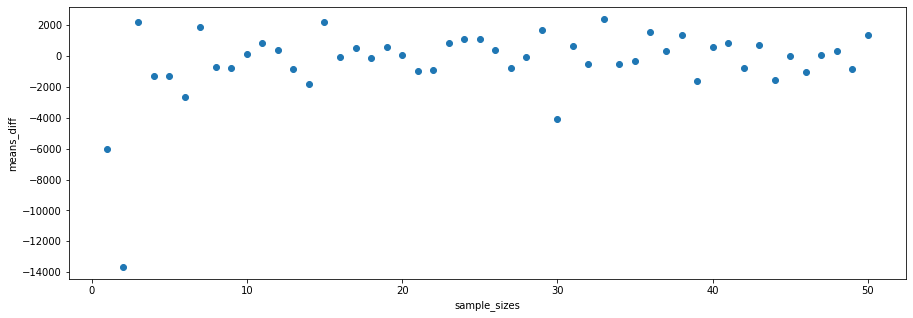

In [218]:
plt.scatter(sample_sizes,means_diff)
plt.xlabel('sample_sizes')
plt.ylabel('means_diff')
plt.gcf().set_size_inches((15, 5))   
plt.show()

#### Repating with larger number

In [234]:
sample_sizes1 = []

for i in range(1,300):
    sample_sizes1.append(i)

In [235]:
means_diff1 = []
for i in sample_sizes1:
    random_df1 = df_1.sample(i)
    avg2 = random_df1["TUITIONFEE_IN"].mean()
    difference1 = avg_fee - avg2
    means_diff1.append(difference1)

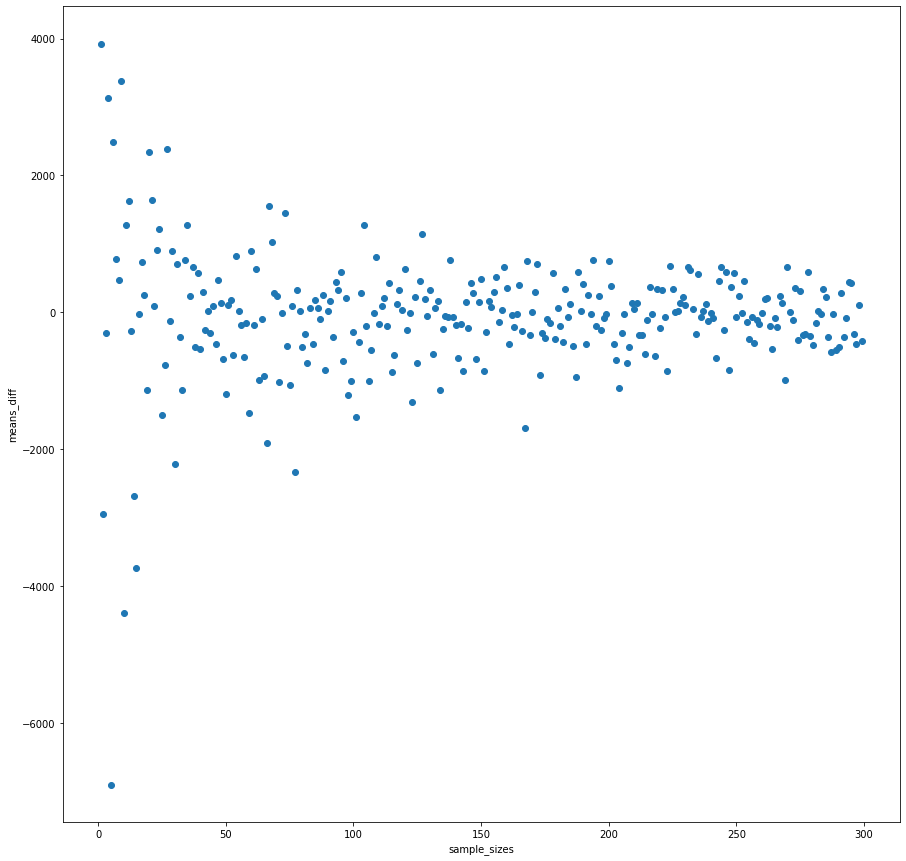

In [244]:
plt.scatter(sample_sizes1,means_diff1)
plt.xlabel('sample_sizes')
plt.ylabel('means_diff')
plt.gcf().set_size_inches((15, 15))   
plt.show()